## PART A

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df1=pd.read_csv("C:\\Users\\91630\\Downloads\\Normal.csv")
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [5]:
df1.shape

(100, 7)

We have 7 columns and 100 rows

In [6]:
df2=pd.read_csv("C:\\Users\\91630\\Downloads\\Type_H.csv")
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [7]:
df2.shape

(60, 7)

We have 60 rows and 7 columns

In [8]:
df3=pd.read_csv("C:\\Users\\91630\\Downloads\\Type_S.csv")
df3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [9]:
df3.shape

(150, 7)

we have 7 columns and 150 rows

Comparing data frames

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [13]:
df=df1.append([df2,df3])
df.shape

(310, 7)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [15]:
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

There is no null value 

Class is object, so we need to change the datatype of this column.

In [16]:
df['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

Here some columns represent same type which are:
tp_s and Type_S
Normal and Nrmal
Type_H and type_h

therefore we need to change

In [17]:
df.loc[df['Class']=='tp_s','Class']='Type_S'
df.loc[df['Class']=='Nrmal','Class']='Normal'
df.loc[df['Class']=='type_h','Class']='Type_H'

In [18]:
df['Class']=df['Class'].astype('category')
df['Class'].nunique()

3

creating category for model.

We have 3 categories

In [76]:
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])
df['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

In [77]:
df['Class']=df['Class'].astype('category')

## printing 5 random samples from dataset

In [19]:
df.sample(n = 5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
107,72.343594,16.420790,59.869012,55.922805,70.082575,12.072644,Type_S
54,54.503685,6.819910,47.000000,47.683775,111.791172,-4.406769,Normal
91,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,Normal
12,48.915551,19.964556,40.263794,28.950995,119.321358,8.028895,Type_H
7,75.649731,19.339799,64.148685,56.309932,95.903629,69.551303,Type_S


## Print Feature-wise percentage of Null values

In [20]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

## Check 5-point summary of the new DataFrame

In [21]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


P_incidence:

    Mean is of 60.49 .
    
    standard deviation is near to 17.

    We have 75% value less than 72.87.
    
    There is maximum value which is 129.83

P_tilt:

    Mean is nearly about 17.5 .
    
    standard deviation is near to 10.

    It also contains negative values.


L_angle:

    Mean is near about 51.
    
    standard deviation is near to 18.5.

    There might be few outliers.
    
S_slope:

    Mean and Median are nearly equal.

    standard deviation of 13.
    
P_radius:

    Distribution is normal.

    standard deviation of 13.

S_Degree:

    Mean is greater than Median so there might be right skewness in the data .

    We can see 75% of values are less than 41 but maximum value is 418 so there is obvious outliers in the data.

## Visualize a heatmap to understand correlation between all features

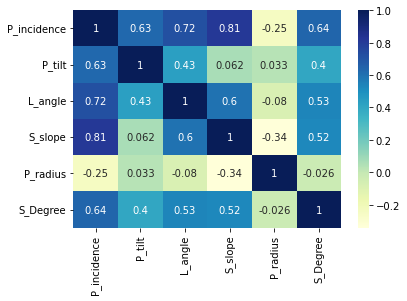

In [22]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

1. s_slope and p_incident have correlation value of 0.81 which is a high correlation value.

2. L_angle and p_incident have correlation value of 0.72 which is good correlation value.

3. p_radius and p_incident have correlation value of -0.026 which is very low correlation value.

4. p_radius and L_angle have correlation value of -0.08 which is very low correlation value.

## Visualize a pairplot with 3 classes distinguished by colors and share insights

In [23]:
import warnings
warnings.filterwarnings("ignore")

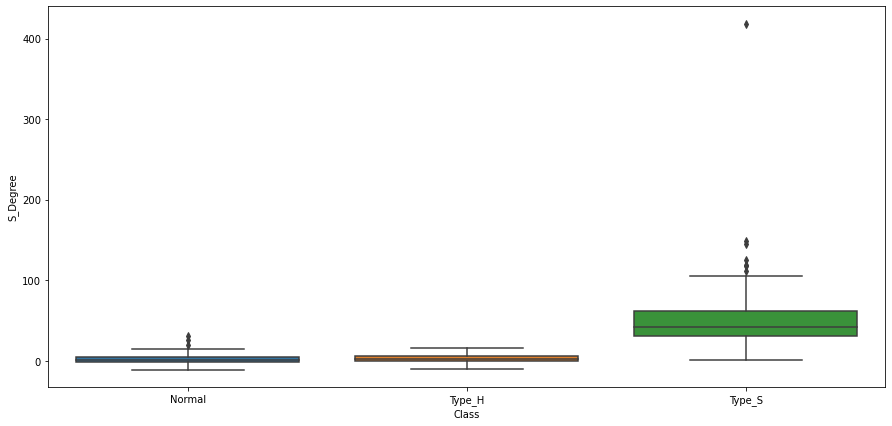

In [28]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='S_Degree', data= df)
plt.show()

ValueError: cannot reindex from a duplicate axis

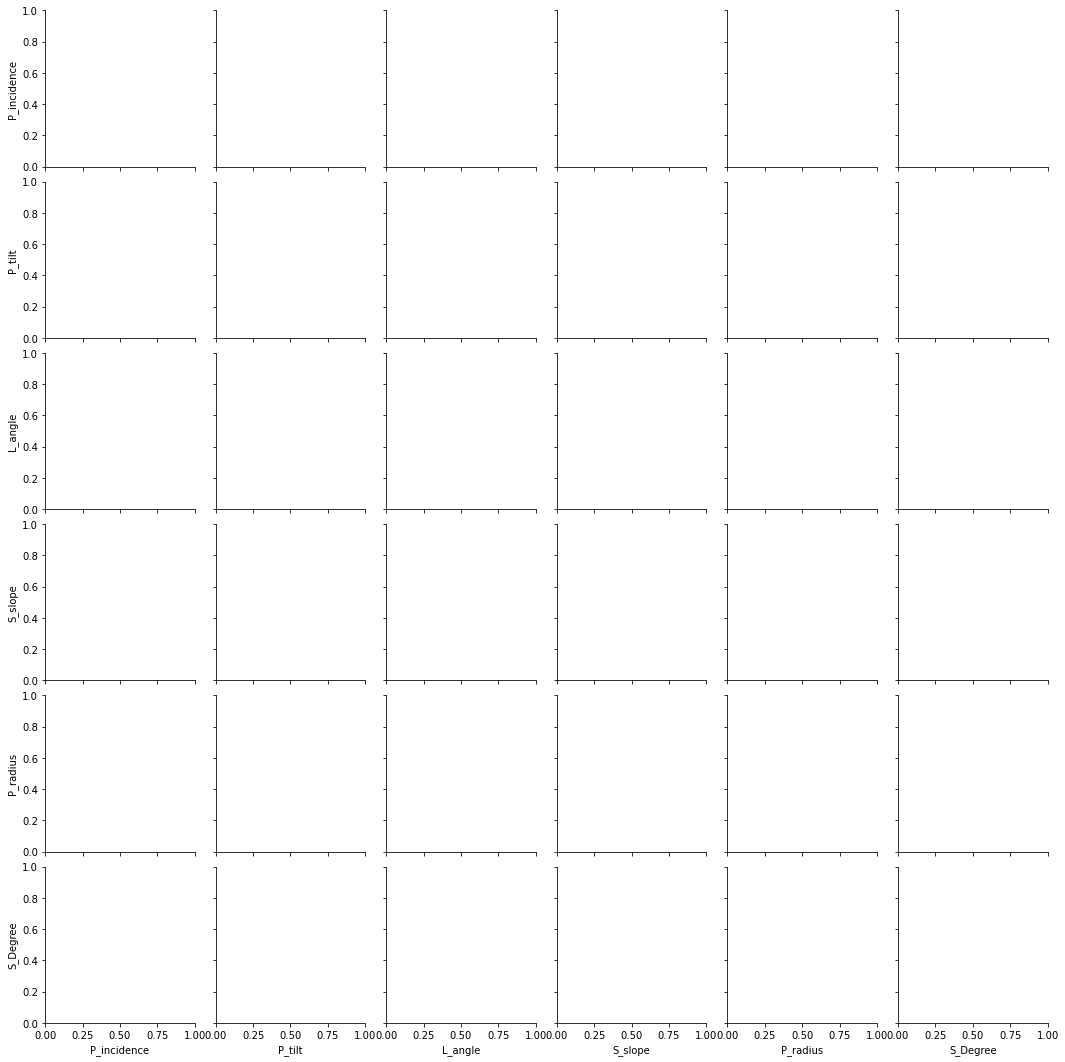

In [78]:
sns.pairplot(df,hue='Class')

## Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights

ValueError: cannot reindex from a duplicate axis

<Figure size 1080x504 with 0 Axes>

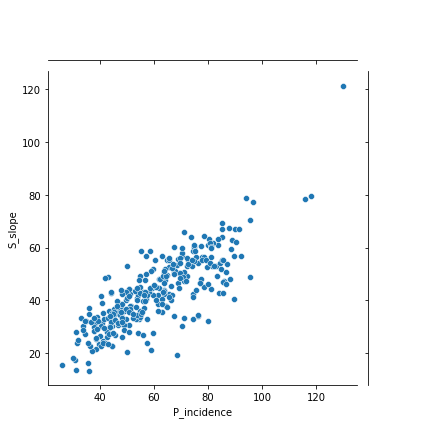

In [36]:
plt.figure(figsize=(15,7))
sns.jointplot(x='P_incidence', y='S_slope', data= df);
plt.show()


1. from above graph we can clearly see that s_slope and p_incidence have a high colerration.
2. there is outlier in the graph as well 

## Visualize a boxplot to check distribution of the features and share insights

P_incidence

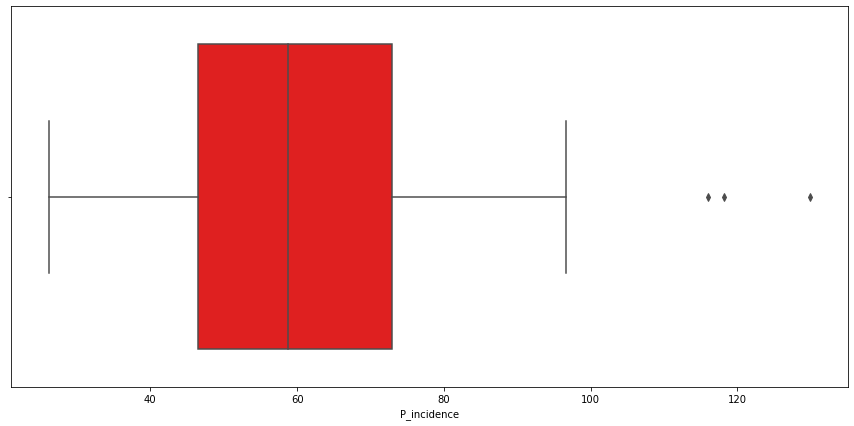

In [41]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'P_incidence', data=df,  orient='h' ,color='Red');

1. there are 3 outliers.
2. mean is about 59.

P_tilt

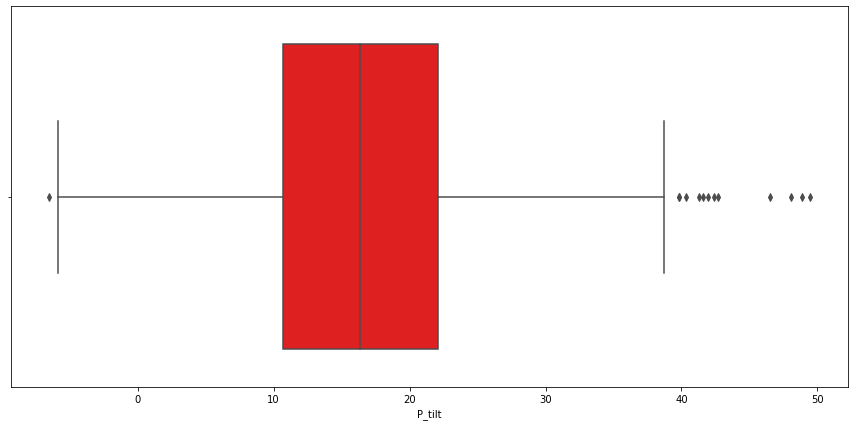

In [42]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'P_tilt', data=df,  orient='h' ,color='Red');

1. there many outliers.
2. there are also negative values.
3. mean is about 17.

L_angle

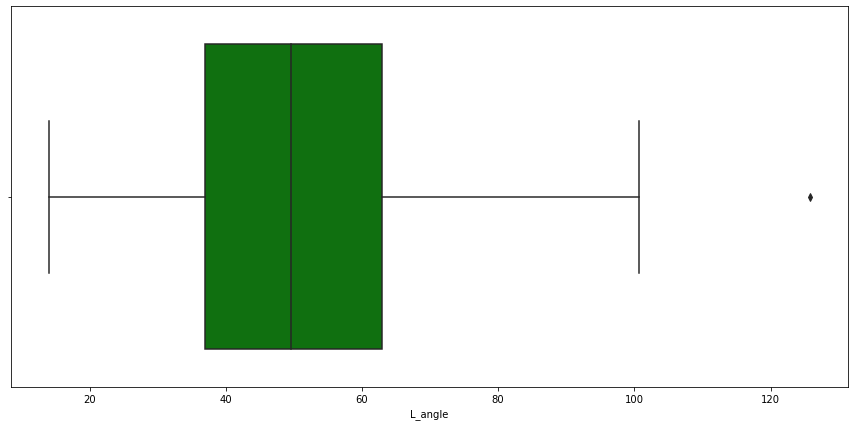

In [44]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'L_angle', data=df,  orient='h' ,color='Green');

1. mean is about 50.
2. there is only one outlier.

S_slope

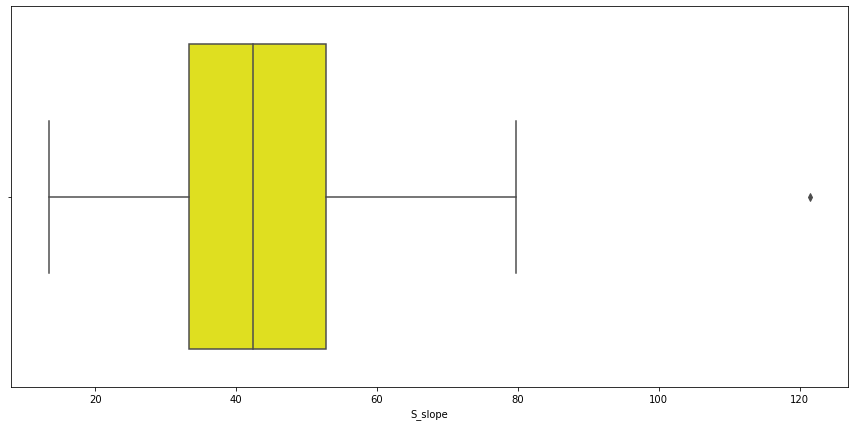

In [46]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'S_slope', data=df,  orient='h' ,color='Yellow');

1. Mean is about 50.
2. There is only one outlier.

P_radius

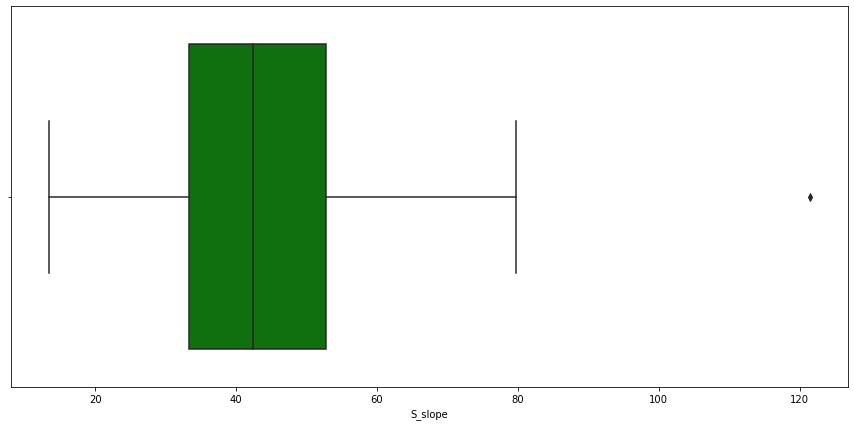

In [48]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'S_slope', data=df,  orient='h' ,color='green');

1. mean is about 42.
2. there is one outlier.

S_degree

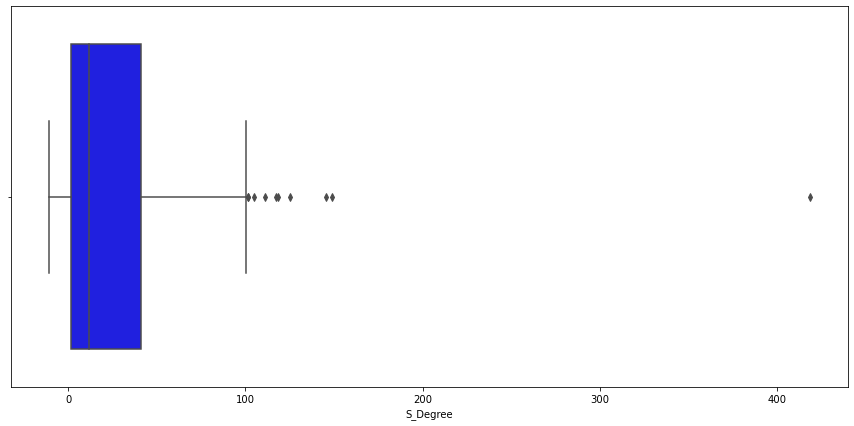

In [50]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'S_Degree', data=df,  orient='h' ,color='Blue');

1. there is many outlier.
2. mean is about 10.

## Split data into X and Y.

In [51]:
X=df.drop(columns='Class')
y=df['Class']

In [52]:
X.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [54]:
from scipy.stats import zscore
X_Scaled=X.apply(zscore)
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,1.042177e-16,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
P_tilt,310.0,2.096889e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
L_angle,310.0,1.980495e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
S_slope,310.0,2.829278e-17,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
P_radius,310.0,-5.071212e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
S_Degree,310.0,-1.277204e-16,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' )

In [57]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

In [59]:
print(KNN.score(X_train, y_train))
print(KNN.score(X_test, y_test))

0.9153225806451613
0.7096774193548387


Training Acuracy is 0.89 and Testing Accuracy is 0.77.
looking at accuracy we can say that model has overfit the data.

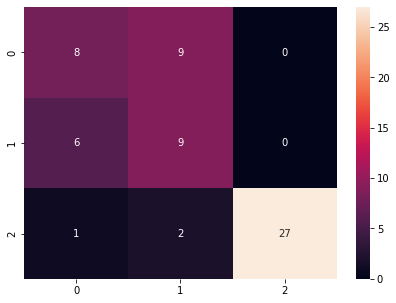

In [67]:
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True )
plt.show()

finding the best k value

In [68]:
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

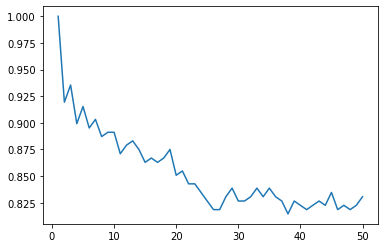

In [69]:
plt.plot(range(1,51),train_score)
plt.show()

In [71]:
from sklearn.metrics import classification_report
k=[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' )
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.7419354838709677:
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.57      0.47      0.52        17
      Type_H       0.53      0.67      0.59        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.74        62
   macro avg       0.69      0.69      0.68        62
weighted avg       0.75      0.74      0.74        62

Accuracy on Training data for k 3 is 0.9354838709677419:
Accuracy on Test data for k 3 is 0.7419354838709677:
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.57      0.47      0.52        17
      Type_H       0.53      0.67      0.59        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.74        62
   macro avg       0.69      0.69      0.68        62
weighted avg       0.75      0.74     

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()
svc_model_linear = SVC(kernel='linear',C=1,gamma=.6)
svc_model_rbf = SVC(kernel='rbf',degree=2,C=.009)
svc_model_poly  = SVC(kernel='poly',degree=2,gamma=0.1,C=.01)

LR: 0.864516 (0.049556)
KNN: 0.829032 (0.054074)
NB: 0.825806 (0.035921)
SVM-linear: 0.848387 (0.066188)
SVM-poly: 0.819355 (0.050389)
SVM-rbf: 0.483871 (0.070674)


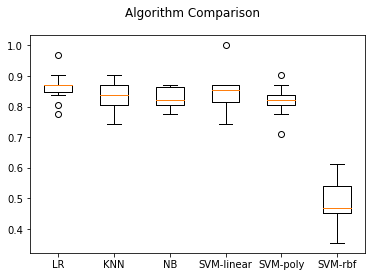

In [74]:
from sklearn import model_selection

seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## PART B

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [3]:
df1=pd.read_csv("C:\\Users\\91630\\Downloads\\Data1.csv")
df1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [4]:
df1.shape

(5000, 8)

In [5]:
df2=pd.read_csv("C:\\Users\\91630\\Downloads\\Data2.csv")
df2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [6]:
df2.shape

(5000, 7)

## Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [7]:
df=df1.merge(df2,left_on='ID',right_on='ID')
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [8]:
df.shape

(5000, 14)

In [9]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [10]:
col=['CreditCard','InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
for i in col:
    df[i]=df[i].astype('object')

In [11]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

In [12]:
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


we have missing values

In [14]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

column id is not informational for this model so we will drop it

In [15]:
df.drop('ID',axis=1,inplace=True)
df.describe()

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage,LoanOnCard
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,93152.420482,1.939536,56.589759,0.096386
std,11.464212,11.468716,46.07009,2123.660073,1.750006,101.836758,0.295149
min,23.000000,-3.000000,8.00000,9307.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,91911.000000,0.700000,0.000000,0.000000
50%,45.000000,20.000000,64.00000,93407.000000,1.500000,0.000000,0.000000
75%,55.000000,30.000000,98.00000,94608.000000,2.525000,101.000000,0.000000
max,67.000000,43.000000,224.00000,96651.000000,10.000000,635.000000,1.000000


### Visualize distribution of Target variable ‘LoanOnCard’

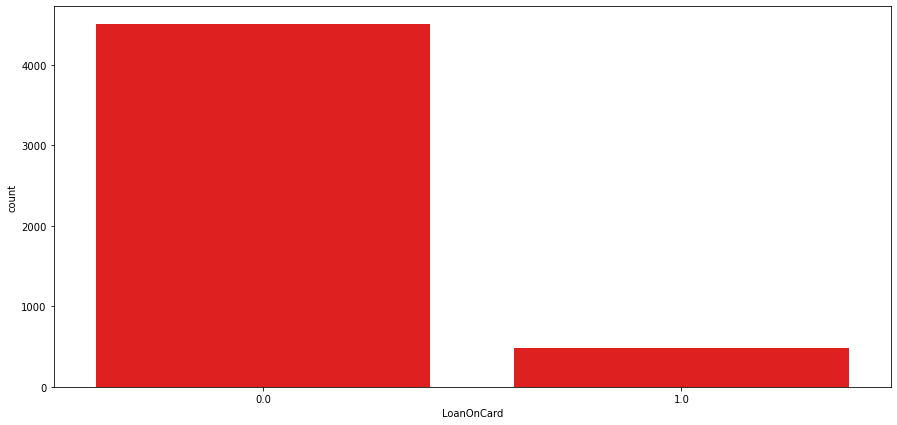

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'LoanOnCard', data=df,  orient='h' ,color='red');

we can observe that very few have a loan on credit card.

### the percentage of missing values

In [17]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.0
dtype: float64

### Split data into X and Y

In [18]:
X=df.drop(columns='LoanOnCard')
y=df['LoanOnCard'] 

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [20]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

In [21]:
logit.score(X_train, y_train) 

0.9271753681392235

In [22]:
logit.score(X_test, y_test)

0.9365461847389558

our model predicts 93% of accuracy in train data while in test data it increases by 1%.

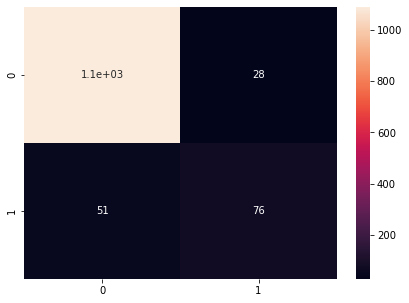

In [23]:
cm = confusion_matrix(y_test, logit_pred)

plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True )
plt.show()

from above fig we can clearly see that our model makes less mistake anf accuracy is high

### Balance the data using the right balancing technique

In [24]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42)
x_s,y_s=smote_nc.fit_resample(X,y)

In [25]:
print('Before sampling:')
print(y.value_counts())

Before sampling:
0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


In [26]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
1.0    4500
0.0    4500
Name: LoanOnCard, dtype: int64


our data is balanced now

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.30, random_state=10)

In [28]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

In [29]:
logit.score(X_train, y_train)

0.8695238095238095

In [30]:
logit.score(X_test, y_test)

0.86

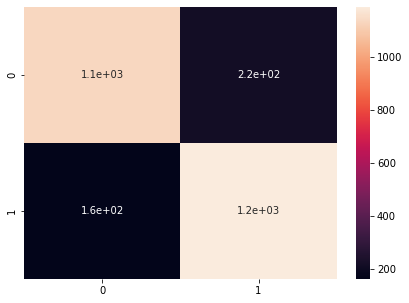

In [31]:
cm = confusion_matrix(y_test, logit_pred)

plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True )
plt.show()

LR: 0.909237 (0.012883)
KNN: 0.899398 (0.011088)
NB: 0.885743 (0.011655)


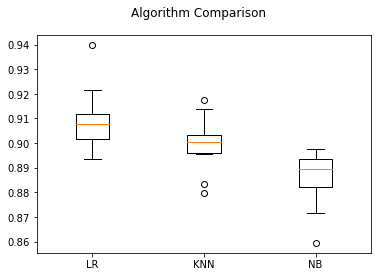

In [32]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()

models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)

ax.set_xticklabels(names)
plt.show()